# Численное интегрирование
Необходимо для функции $f(x)$ вычислить значение определенного интеграла:
\begin{align*}
    I = \int\limits_a^b f(x)dx
\end{align*}
Представим (приближенно) наш интеграл $I$ в виде квадратурной формулы:
\begin{align*}
    I \approx I_N = \sum\limits_{i=0}^N A_i f(\xi_i)
\end{align*}
Задача найти такие коэффициенты $A_i$ и такое разбиение (точки отсчета $\xi_i$), при которых сумма будет приближать интеграл с желаемой точностью.

## Источники
- Н.С. Бахвалов, Н.П. Жидков, Г.М. Кобельков. Численные методы.
- [методичка](https://mipt.ru/upload/medialibrary/235/integration.pdf)
- [Статья хабр](https://habr.com/ru/post/420867/)

C:\Users\Kirill\AppData\Local\Temp/ipykernel_16052/882440967.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


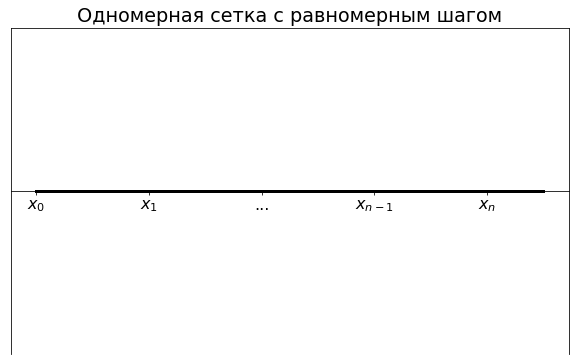

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16}) # Для изменения размера шрифта на графиках

x = np.arange(0, 10)
y = x*0

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y, 'k', lw=3)
ax.set_title('Одномерная сетка с равномерным шагом')
ax.set_yticks([]);
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['', '$x_0$', '$x_1$','...','$x_{n-1}$','$x_{n}$']

ax.set_xticklabels(labels)
ax.spines['bottom'].set_position('center')


# Метод прямоугольников
Будем на каждом отрезке $[x_i, x_{i+1}]$ приближать функцию постоянным значением. Пусть $\xi$ является серединой отрезка $[x_i, x_{i+1}]$, тогда:
\begin{align*}
    I \approx I_N = \sum\limits_{i=1}^N f \left( \frac{x_{i-1}+x_{i}}{2} \right)\Delta x_i
\end{align*}
В данном случае метод будет называться методом *средних прямоугольников*.
<center><img src="rectangular.png" alt="drawing" width="900"/></center>

Numerical Integration result: 0.959573
Exact solution: 0.959572
Error: 1.07188e-06


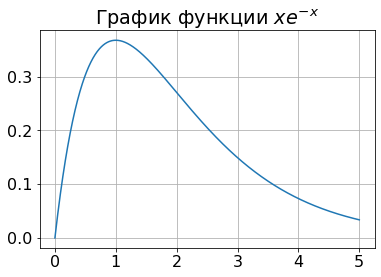

In [2]:
N = 1000 # Количество точек (интервалов N-1)
x = np.linspace(0, 5, N)
func = lambda x: x*np.exp(-x)
plt.plot(x, func(x))
plt.grid()
plt.title('График функции $xe^{-x}$')
exact_sol = 1-6/np.e**5

def midpoint_rectangle(x, func):
    dx = x[1]-x[0]
    result = 0
    for ii in range(1, len(x)):
        result += func((x[ii-1]+x[ii])/2)
    return result*dx

result = midpoint_rectangle(x, func)
print('Numerical Integration result: %g\nExact solution: %g\n\
Error: %g' % (result, exact_sol, abs(result-exact_sol)))

Необязательно выбирать точки в середине отрезка. Можно, например, взять левый или правый конец отрезка. Получим формулы *левых* и *правых прямоугольников* соответственно:
\begin{align*}
    I \approx I_{left} = \sum\limits_{i=1}^N f ( x_{i-1})\Delta x_i
\end{align*}
\begin{align*}
    I \approx I_{right} = \sum\limits_{i=1}^N f ( x_{i})\Delta x_i
\end{align*}

In [3]:
def left_rectangle(x, func):
    dx = x[1]-x[0]
    result = 0
    for ii in range(1, len(x)):
        result += func(x[ii-1])
    return result*dx 

def right_rectangle(x, func):
    dx = x[1]-x[0]
    result = 0
    for ii in range(1, len(x)):
        result += func(x[ii])
    return result*dx 

result_left = left_rectangle(x, func)
result_right = right_rectangle(x, func)
print('Numerical Integration result: %g\nExact solution: %g\n\
Error: %g' % (result_left, exact_sol, abs(result_left-exact_sol)))
print('----------')
print('Numerical Integration result: %g\nExact solution: %g\n\
Error: %g' % (result_right, exact_sol, abs(result_right-exact_sol)))

Numerical Integration result: 0.959486
Exact solution: 0.959572
Error: 8.64524e-05
----------
Numerical Integration result: 0.959654
Exact solution: 0.959572
Error: 8.21649e-05


# Формула трапеций
В предыдущем примере мы приближали исходную функцию постоянным значением на каждом интервале. В формуле трапеций функция $f(x)$ на каждом интервале заменяется на кусочно-линейную функцию, совпадающую с $f(x)$ в точках $x=x_{i-1}$, $x=x_{i}$:
\begin{align*}
    I \approx I_N = \sum\limits_{i=1}^N \frac{f(x_{i-1})+f(x_i)}{2} \Delta x_i
\end{align*}
<center><img src="Trapezoid_integral.png" alt="drawing" width="400"/></center>

In [4]:
def trapez(x, func):
    dx = x[1]-x[0]
    result = 0
    for ii in range(1, len(x)):
        result += (func(x[ii-1]) + func(x[ii]))/2
    return result*dx 

result_trapez = trapez(x, func)
print('Numerical Integration result: %g\nExact solution: %g\n\
Error: %g' % (result_trapez, exact_sol, abs(result_trapez-exact_sol)))



Numerical Integration result: 0.95957
Exact solution: 0.959572
Error: 2.14377e-06


# Формула Симпсона

Можно пойти дальше и заменить исходную функцию на параболу на отрезке $[x_{i-1}, x_i]$. Тогда формула будет иметь вид:
\begin{align*}
    I \approx I_N = \sum\limits_{i=1}^N \frac{f(x_{i-1})+4f(\frac{x_{i-1}+x_i}{2})+f(x_i)  }{6} \Delta x_i
\end{align*}
<center><img src="Simpson_integral.png" alt="drawing" width="700"/></center>

In [5]:
def simpson(x, func):
    dx = x[1]-x[0]
    result = 0
    for ii in range(1, len(x)):
        term_1 = func(x[ii-1])
        term_2 = 4*func((x[ii-1]+x[ii])/2)
        term_3 = func(x[ii])
        result += 1/6*(term_1+term_2+term_3)
    return result*dx 
    
result_simpson = simpson(x, func)
print('Numerical Integration result: %g\nExact solution: %g\n\
Error: %g' % (result_simpson, exact_sol, abs(result_simpson-exact_sol)))

Numerical Integration result: 0.959572
Exact solution: 0.959572
Error: 6.56697e-13


Рассмотренные выше формулы относятся к подходу/методу *Ньютона-Котеса*. Идея заключается в замене исходной функции $f(x)$ на некоторую интегрируемую функцию $P(x)$, которая является, например, многочленом, тригонометрическим или экспоненциальным полиномом и т.д. Если рассматриваем случай, когда $P(x)$ - многочлен, то задачу приближения исходной функции можно решить, например, с помощью интерполяции Лагранжа. На каждом интервале аппроксимируем с помощью $P_n(x)$:
- $n=0$ - ступенчатая интерполяция,
- $n=1$ - кусочно-линейная интерполяция,
- $n=2$ - параболическая интерполяция.

Для $n \ge 10$ формулы становятся неустойчивыми.